Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2025 <br>

<h1><center>Tarea 1</center></h1>

Profesor: Marcelo Mendoza<br>
Fecha de entrega: 07 de abril 2025



## Indicaciones

Se debe entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se asignará puntaje por el código implementado y los comentarios asociados a resultados.
- El notebook debe tener todas las celdas de código ejecutadas.
- El carácter de esta tarea es INDIVIDUAL.


**NOMBRE ESTUDIANTE:** Benjamin Ruiz Salvatierra 

## Librerías

In [267]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar

## Introducción

El dataset incluye variables cuantitativas y cualitativas sobre tipos de vinos.
A continuación, se presenta una breve descripción de cada atributo:

* type: Tipo de vino

* fixed acidity: Cantidad de ácidos poco volátiles

* volatile acidity: Cantidad de ácidos volátiles

* citric acid: Cantidad de ácido cítrico

* residual sugar: Cantidad de azúcar residual

* chlorides: Cantidad de cloruros

* free sulfur dioxide: Cantidad de dióxido de azufre libre

* total sulfur dioxide: Cantidad total de dióxido de azufre

* density: Densidad del vino

* pH: nivel de acidez o alcalinidad

* sulphates: Cantidad de sulfatos

* alcohol: Cantidad de alcohol

* quality: calidad del vino



## Parte 1: Carga y Preprocesamiento de Datos (20 puntos)

En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.

### 1.1 Carga de Datos (2 puntos)

Cargue el dataset. Indique la cantidad de filas y columnas del conjunto de datos. ¿Existen datos nulos? De ser así, mencione el número de casos por variable y luego elimine todas filas que tengan a lo menos un valor nulo.


RESPUESTA:

In [268]:
# Cargamos los datos de los vinos
df_vinos = pd.read_csv("Dataset_tarea1.csv")

In [269]:
df_vinos.shape # Vemos la información del dataframe

(6497, 13)

In [270]:
df_vinos.isnull().sum() # Comprobamos si hay valores nulos

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [271]:
sum(df_vinos.isnull().sum()) # Sumamos todas las columnas con valores nulos

38

Gracias al método de `info()` podemos ver que el dataset posee 6.497 filas y 13 columnas, además de que al utilizar el método `isnull().sum()` podemos ver que existen 7 columnas con datos nulos, las cuales son `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`, `pH` y `sulphates`, habiendo un total de 38 datos nulos.

In [272]:
df_vinos.dropna(inplace=True) # Eliminamos los valores nulos

In [273]:
sum(df_vinos.isnull().sum()) # Comprobamos que no hay valores nulos

0

In [274]:
df_vinos.shape # Vemos la información del dataframe después de eliminar los nulos

(6463, 13)

Podemos ver que luego de la limpieza de datos nulos, quedó una cantidad final de 6.463 filas y 13 columnas.

### 1.2 Análisis descriptivo (12 puntos)

Mediante gráficos y medidas numéricas apropiadas, describa el comportamiento de cada variable del dataset.

Luego, presente gráficos que permitan relacionar las siguientes variables:

* "density" con "fixed acidity"
* "quality" con "alcohol"

Analice todos los resultados obtenidos y comente.

RESPUESTA:

In [275]:
df_vinos.info() # Análizamos los tipos de variables dentro del dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


C:\Users\benja\AppData\Local\Temp\ipykernel_16040\346921179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_vinos, x="type", palette="Set2")


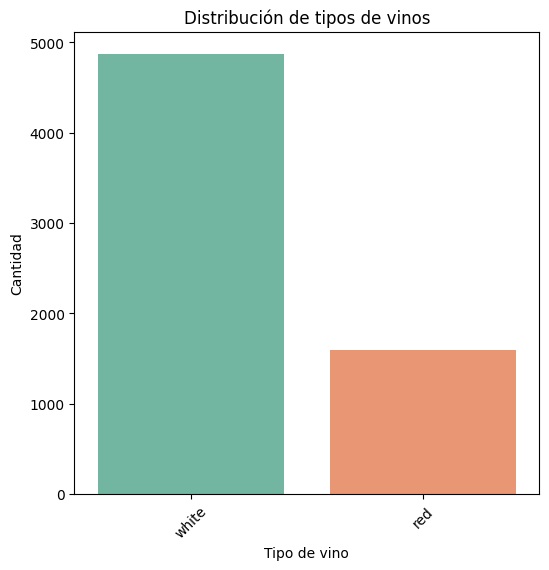

In [276]:
# Graficamos la distribución de tipos de vinos
plt.figure(figsize=(6, 6))
sns.countplot(data=df_vinos, x="type", palette="Set2")
plt.title("Distribución de tipos de vinos")
plt.xlabel("Tipo de vino")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

In [277]:
df_vinos["type"].value_counts() # Vemos la cantidad de cada tipo de vino

type
white    4870
red      1593
Name: count, dtype: int64

**Interpretación:** Se puede ver que la distribución de vinos blancos y vinos rojos dentro del dataset es bastante dispar, habiendo una mayor cantidad de vinos blancos (4.870) que de vinos rojos (1.593), pudiendo llegar a influir en el análisis posterior ya que existe un sesgo en la cantidad de datos por tipo de vino. 

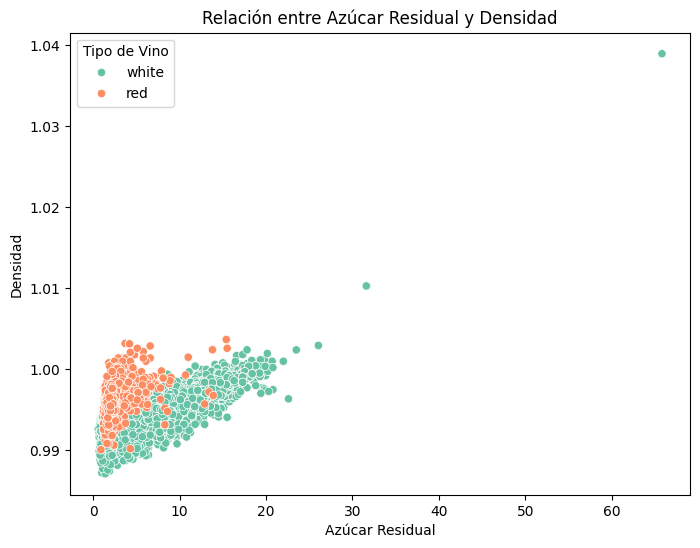

In [278]:
# Graficamos la relación entre "residual sugar" y "densidad"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_vinos, x="residual sugar", y="density", hue="type", palette="Set2")
plt.title("Relación entre Azúcar Residual y Densidad")
plt.xlabel("Azúcar Residual")
plt.ylabel("Densidad")
plt.legend(title="Tipo de Vino")
plt.show()

**Interpretación:** Analizando la relación gráfica de datos entre la variable de `density` y `residual sugar`, se puede apreciar que existe una tendencia de crecimiento lineal entre ambas variables, lo cual tiene sentido debido a que el azúcar es más densa que el agua y el alcohol, por lo que, por lo que si el proceso de fermentación no se lleva a cabo de forma correcta, el vino puede llegar a tener un mayor contenido de azúcar y por lo tanto una mayor densidad. 

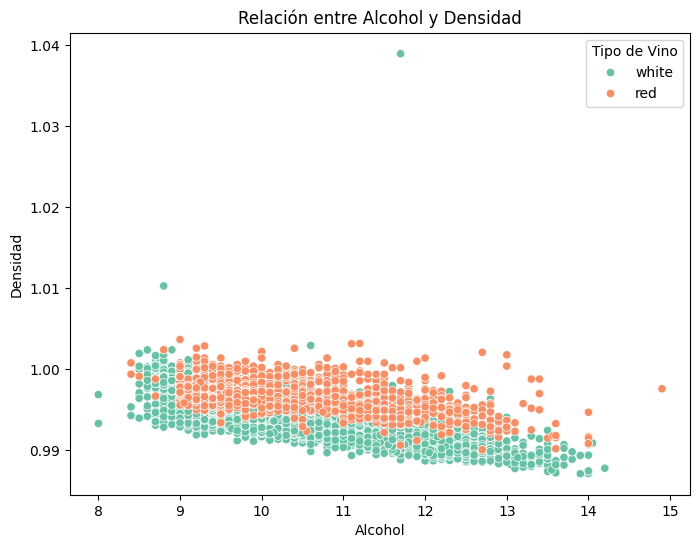

In [279]:
# Graficamos la relación entre "alcohol" y "densidad"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_vinos, x="alcohol", y="density", hue="type", palette="Set2")
plt.title("Relación entre Alcohol y Densidad")
plt.xlabel("Alcohol")
plt.ylabel("Densidad")
plt.legend(title="Tipo de Vino")
plt.show()

**Interpretación:** Analizando el caso entre la relación de las variables de `alcohol` y `density`, se puede ver que existe una tendencia de decrecimiento lineal, teniendo bastante sentido ya que si nos basámos en el gráfico anterior, una menor cantidad de azúcar residual (que se traduce en una mayor cantidad de alcohol), se traduce en una menor densidad del vino.

### 1.3 Normalizar datos (3 puntos)

Realice un proceso de normalización, utilizando MinMaxScaler. No considere las variables quality y type.

Explique por qué es útil realizar esta normalización.

RESPUESTA:

In [280]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_vinos_normalizado = df_vinos.copy().drop(columns=["type", "quality"])
df_vinos_normalizado[df_vinos_normalizado.columns] = scaler.fit_transform(df_vinos_normalizado[df_vinos_normalizado.columns]) 
df_vinos_normalizado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362


**Explicación:** Normalizar los valores numéricos de un dataframe es útil para evitar que la gran diferencia de escala (rangos o magnitudes) entre las variables afecte a la hora del entrenamiento de algún modelo de machine learning, además de mejorar la interpretación de los resultados obtenidos. En este caso, se utilizó el método de MinMaxScaler, el cual transforma los datos a un rango entre 0 y 1, lo que permite que todas las variables tengan la misma importancia al momento de entrenar un modelo.

### 1.4 Correlación (3 puntos)

Construya una matriz de correlación. Identifique las variables que presentan una alta relación lineal (superior a 0.6 o inferior a -0.6).

**Observación**

Para este análisis solo trabaje con las variables normalizadas en el paso anterior.

RESPUESTA:

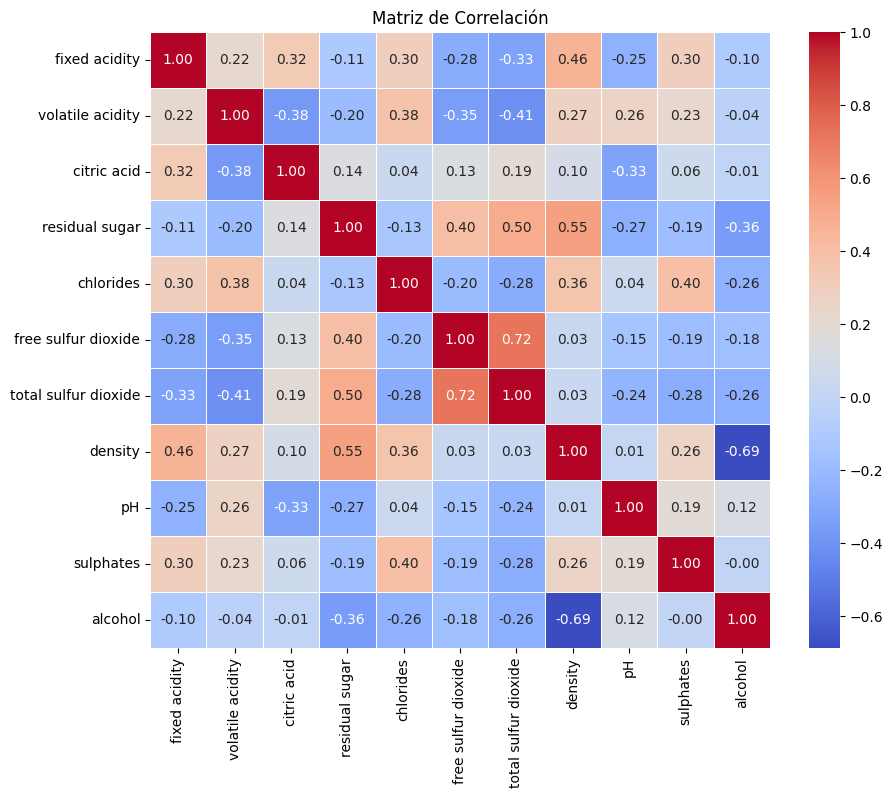

In [281]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_vinos_normalizado.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

**Interpretación:** Al observar la matriz de correlación, se puede observar que las variables que poseen una relación lineal (tanto negativa como positiva), son las variables de `density` y `alcohol` (-0.69), `free sulfur dioxide` y `total sulfur dioxide` **(0.72)**. Sin embargo, relaciones como `residual sugar` y `density` **(0.55)**, `total sulfur dioxide` y `residual sugar` **(0.50)**, `density` y `fixed acidity` **(0.46)**, si bien no cumplen con el criterio de 0.6 o -0.6, son relaciones que podrían ser interesantes de analizar ya que poseen una cierta relación entre sí.

## Parte 2: Reducción de dimensionalidad PCA (10 puntos)

**En esta segunda sección se debe utilizar el resultado 1.3 de la parte 1. Para reducir la dimensionalidad, se debe trabajar con Principal Component Analysis (PCA)**.

### 2.1 Comportamiento de la varianza (5 puntos)

Grafique el comportamiento de la varianza explicada en función del número de componentes. Analice los resultados obtenidos.

RESPUESTA:

In [282]:
from sklearn.decomposition import PCA

pca = PCA(n_components=min(df_vinos_normalizado.shape)-1) 
pca.fit(df_vinos_normalizado) 

PCA(n_components=10)

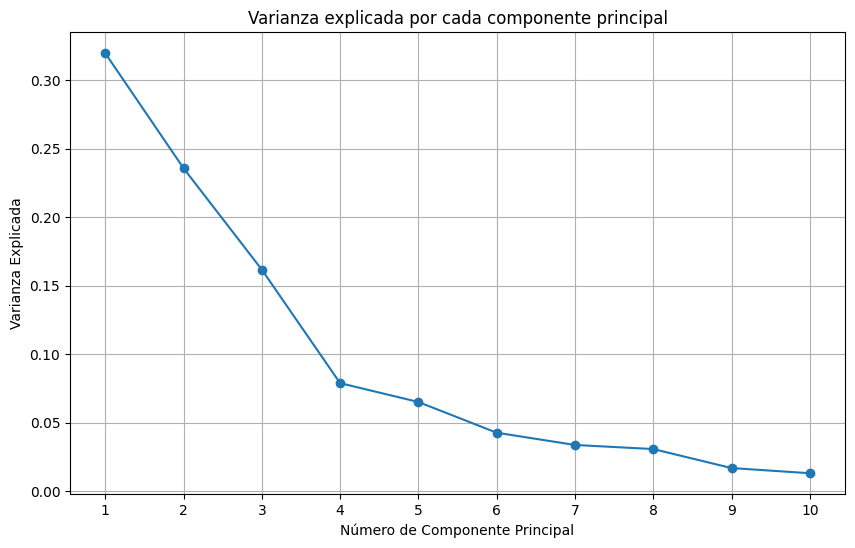

In [283]:
# Graficamos la varianza capturada por cada componente principal
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker="o")
plt.title("Varianza explicada por cada componente principal")
plt.xlabel("Número de Componente Principal")
plt.ylabel("Varianza Explicada")
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.grid()
plt.show()

**Interpretación:** Si consideramos una cantidad de componentes principales igual a la cantidad de columnas -1, podemos ver que el gráfico de la varianza explicada se comporta de forma decreciente, lo que tiene sentido ya que a medida que se van agregando componentes, la varianza explicada por cada uno de ellos va disminuyendo. Sin embargo, al observar el gráfico, podemos ver que a partir del componente 5, la varianza explicada comienza a estabilizarse y, por lo tanto, podemos suponer que con 5 componentes principales sería suficiente para explicar la mayoría de la varianza de los datos.

### 2.2 Retener 90% de la varianza (3 puntos)

Aplique PCA para retener un 90% de la varianza del conjunto de datos normalizado del punto 1.3. ¿Cuál es el número de componentes que se requieren?

RESPUESTA:

In [284]:
# Utilizamos el código visto en la ayudantía
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i
min_var(0.9,pca.explained_variance_ratio_)

6

Vemos que nuestra suposición a partir del gráfico no estaba muy alejada de la realidad, siendo necesaria una cantidad de 6 componentes principales para poder retener el 90% de la varianza del conjunto de datos normalizado.

### 2.3 Reducir dimensionalidad a n=2 (2 puntos)

Considerando el dataset normalizado del punto 1.3, aplique PCA con un número de componentes igual a 2 . Determine la proporción de varianza explicada.

RESPUESTA:

In [285]:
# Reducimos la dimensionalidad a 2D
pca = PCA(n_components=2)
pca.fit(df_vinos_normalizado)

PCA(n_components=2)

In [286]:
# Determinamos la proporción de varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por el primer componente: {explained_variance[0]:.2f}")
print(f"Varianza explicada por el segundo componente: {explained_variance[1]:.2f}")

Varianza explicada por el primer componente: 0.32
Varianza explicada por el segundo componente: 0.24


## Parte 3: Detección de outliers (10 puntos)

**En esta tercera parte se debe evaluar la existencia de outliers. Para ello, debe trabajar con la matriz obtenida en el punto 2.2 (retiene el 90% de la varianza)**.

In [287]:
# "Instanciamos" la matriz con un 90% de varianza explicada
pca90 = PCA(n_components=6)
pca90.fit(df_vinos_normalizado)

PCA(n_components=6)

### 3.1 Graficar histograma LOF (4 puntos)

Utilizando la técnica **Local Outlier Factor (LOF)**, construya un histograma de puntajes LOF. Considere un número de vecinos igual a 8 y use como métrica la distancia euclidiana. Analice los resultados obtenidos.

RESPUESTA:

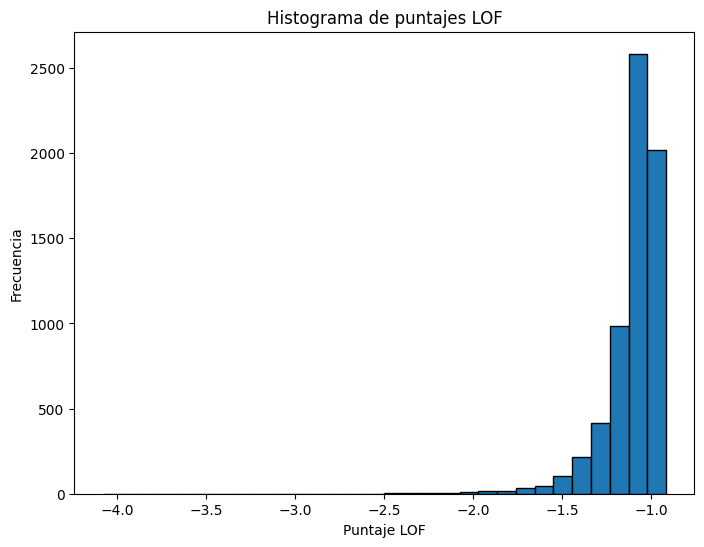

In [288]:
from sklearn.neighbors import LocalOutlierFactor

LOF = LocalOutlierFactor(n_neighbors=8, metric="euclidean")
df_vinos_LOF = df_vinos_normalizado.copy()
df_vinos_LOF["LOF"] = LOF.fit_predict(df_vinos_LOF)

lof_scores = LOF.negative_outlier_factor_

plt.figure(figsize=(8, 6))
plt.hist(lof_scores, bins=30, edgecolor="black")
plt.title("Histograma de puntajes LOF")
plt.xlabel("Puntaje LOF")
plt.ylabel("Frecuencia")
plt.show()

**Interpretación:** Al observar el histograma de los puntajes LOF, podemos ver que La mayoría de los datos tienen puntajes cercanos a -1, lo que indica que no son considerados outliers. Sin embargo, se observan colas a la izquierda con valores inferiores, lo que sugiere la presencia de outliers.

### 3.2 Identificar datos atípicos (6 puntos)

En base al histograma del punto 3.1, y considerando un umbral de corte igual a -1.5, determine los datos atípicos del dataset. ¿Qué proporción de datos corresponden a outliers?

Luego, elimine los datos atípicos del conjunto de datos evaluado.

RESPUESTA:

In [289]:
outlier_indices = np.where(lof_scores < -1.5)[0]

# Obtenemos la proporción de outliers
prop_outliers = len(outlier_indices) / len(df_vinos_LOF)
print("Número de outliers:", len(outlier_indices))
print("Proporción de outliers: {:.2%}".format(prop_outliers))

# Eliminamos los outliers del dataset evaluado
df_vinos_LOF_clean = df_vinos_LOF[lof_scores >= -1.5].copy()
print("Nuevo tamaño del dataset sin outliers:", df_vinos_LOF_clean.shape)

Número de outliers: 178
Proporción de outliers: 2.75%
Nuevo tamaño del dataset sin outliers: (6285, 12)


## Parte 4: Visualización T-SNE y UMAP (20 puntos)

**En esta sección debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.**

In [290]:
df_vinos_LOF_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,LOF
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,1
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,1
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,1
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1


### 4.1 T-SNE (6 puntos)

Describa las principales características del modelo T-SNE.

Ajuste un modelo de 2 componentes mediante T-SNE. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo. ¿Reconoce algún patrón?


RESPUESTA:

**T-SNE:** El modelo T-SNE es una técnica de reducción de dimensionalidad que busca preservar la estructura local de los datos, es decir, intenta mantener la distancia entre puntos cercanos en el espacio original mediante la creación de una representación en un espacio de menor dimensión. Para esto, T-SNE calcula las similitudes entre puntos en el espacio original por medio del cálculo de distancias euclidianas que luego serán transformadas en probabilidades que reflejan la probabilidad de que un punto elija a otro como su vecino, dando así un mayor peso a aquellos puntos cercanos. Luego en el espacio reducido por el modelo, se calculan nuevamente las probabilidades utilizando la distribución t-Student, y se minimiza la divergencia KL entre ambas distribuciones (Gaussiana vs t-Student), buscando que los puntos cercanos en el espacio original permanezcan cercanos en el espacio reducido.

In [291]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=40, n_jobs=10, n_iter=1000, n_iter_without_progress=150)
projection = tsne.fit_transform(df_vinos_LOF_clean.drop(columns=["LOF"]))

**Justificación de hiperparámetros:** 
- `n_components=2`: Se eligen 2 componentes dado que se busca un espacio bidimensional.
- `perplexity=4s0`: Este hiperparámetro controla la cantidad de vecinos que se consideran al calcular las similitudes, por lo que un valor de 40 es un valor comúnmente utilizado.
- `n_jobs=10`: Se utiliza 10 trabajos para paralelizar el proceso de ajuste del modelo, lo que puede acelerar el tiempo de entrenamiento.
- `n_iter=1000`: Se elige un número de iteraciones alto para asegurar la convergencia del modelo, dado que T-SNE puede ser sensible a la inicialización y puede requerir más iteraciones para encontrar una buena representación.
- `n_iter_without_progress=150`: Se establece un número de iteraciones sin progreso para evitar que el modelo se quede atrapado en un mínimo local y no converja adecuadamente.

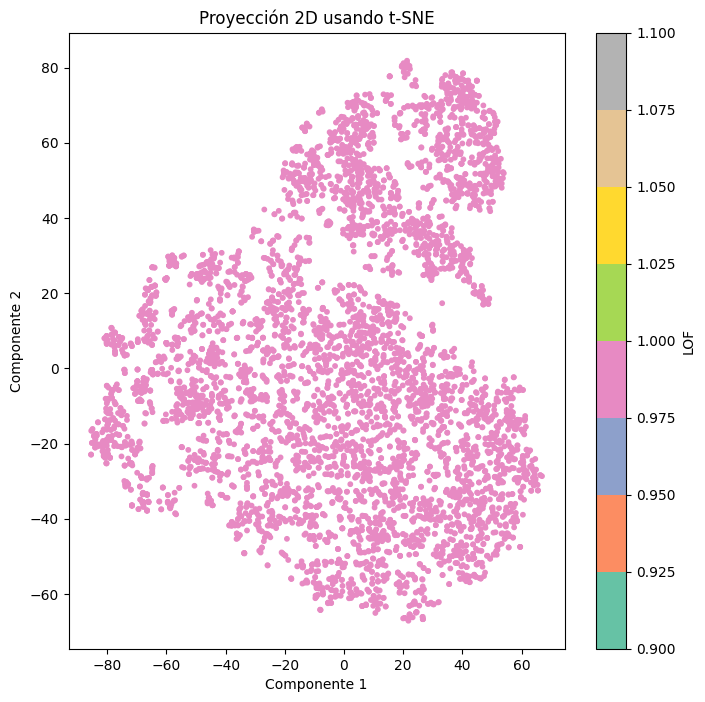

In [292]:
# Graficamos la proyección 2D
plt.figure(figsize=(8, 8))
plt.scatter(projection[:, 0], projection[:, 1], c=df_vinos_LOF_clean["LOF"], cmap="Set2", s=10)
plt.title("Proyección 2D usando t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="LOF")
plt.show()

Se observa que los datos se agrupan en ciertos clusters, lo que indica que existen patrones en la forma en la que se relacionan las características originales, pudiendo sugerir correlaciones o similitudes.

### 4.2 UMAP (6 puntos)

Describa las principales características del modelo UMAP.

Ajuste un modelo 2 componentes mediante UMAP. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo. Compare con el gráfico obtenido al trabajar con TSNE.

RESPUESTA:

**UMAP**: UMAP es un método de reducción de dimensionalidad el cual se basa en la topología de los datos, creando un grafo que representa las relaciones de vecindad entre los puntos en el espacio original. Una vez obtenido el grafo, UMAP busca aprender una representación en baja dimensión que preserve esas conexiones entre datos cercanos. 

In [293]:
import umap.umap_ as umap

umap2d = umap.UMAP(n_components=2, min_dist=0.4, n_neighbors=15, n_jobs=10)
projection_umap = umap2d.fit_transform(df_vinos_LOF_clean.drop(columns=["LOF"]))

**Justificación de hiperparámetros:**
- `n_components=2`: Se eligen 2 componentes dado que se busca un espacio bidimensional.
- `min_dist=0.4`: Este hiperparámetro controla la distancia mínima entre puntos en el espacio reducido, lo que afecta la densidad de los clusters. Un valor de 0.4 permite una cierta separación entre los puntos, evitando que se agrupen demasiado.
- `n_neighbors=15`: Este hiperparámetro controla la cantidad de vecinos que se consideran al construir el grafo de similitud, un valor de 15 es un valor comúnmente utilizado.
- `n_jobs=10`: Se utiliza 10 trabajos para paralelizar el proceso de ajuste del modelo, lo que puede acelerar el tiempo de entrenamiento.

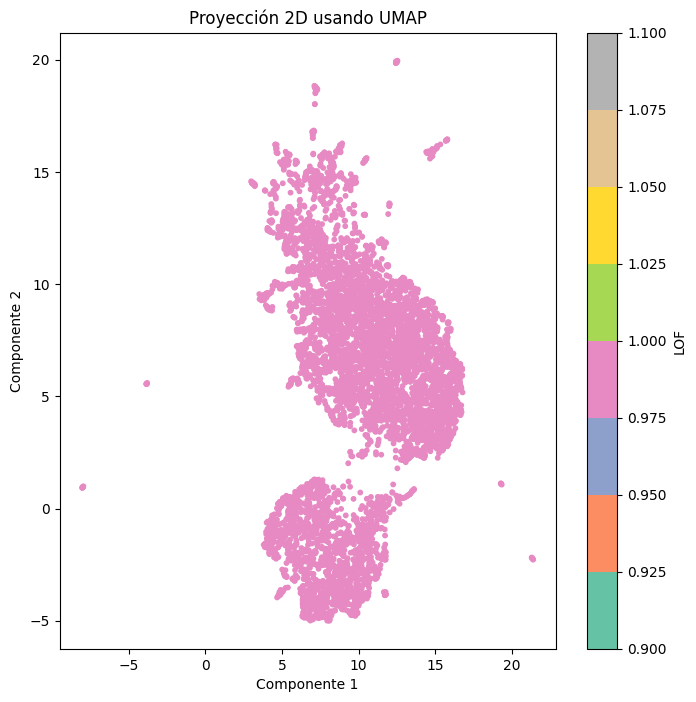

In [294]:
# Graficamos la proyección 2D
plt.figure(figsize=(8, 8))
plt.scatter(projection_umap[:, 0], projection_umap[:, 1], c=df_vinos_LOF_clean["LOF"], cmap="Set2", s=10)
plt.title("Proyección 2D usando UMAP")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="LOF")
plt.show()

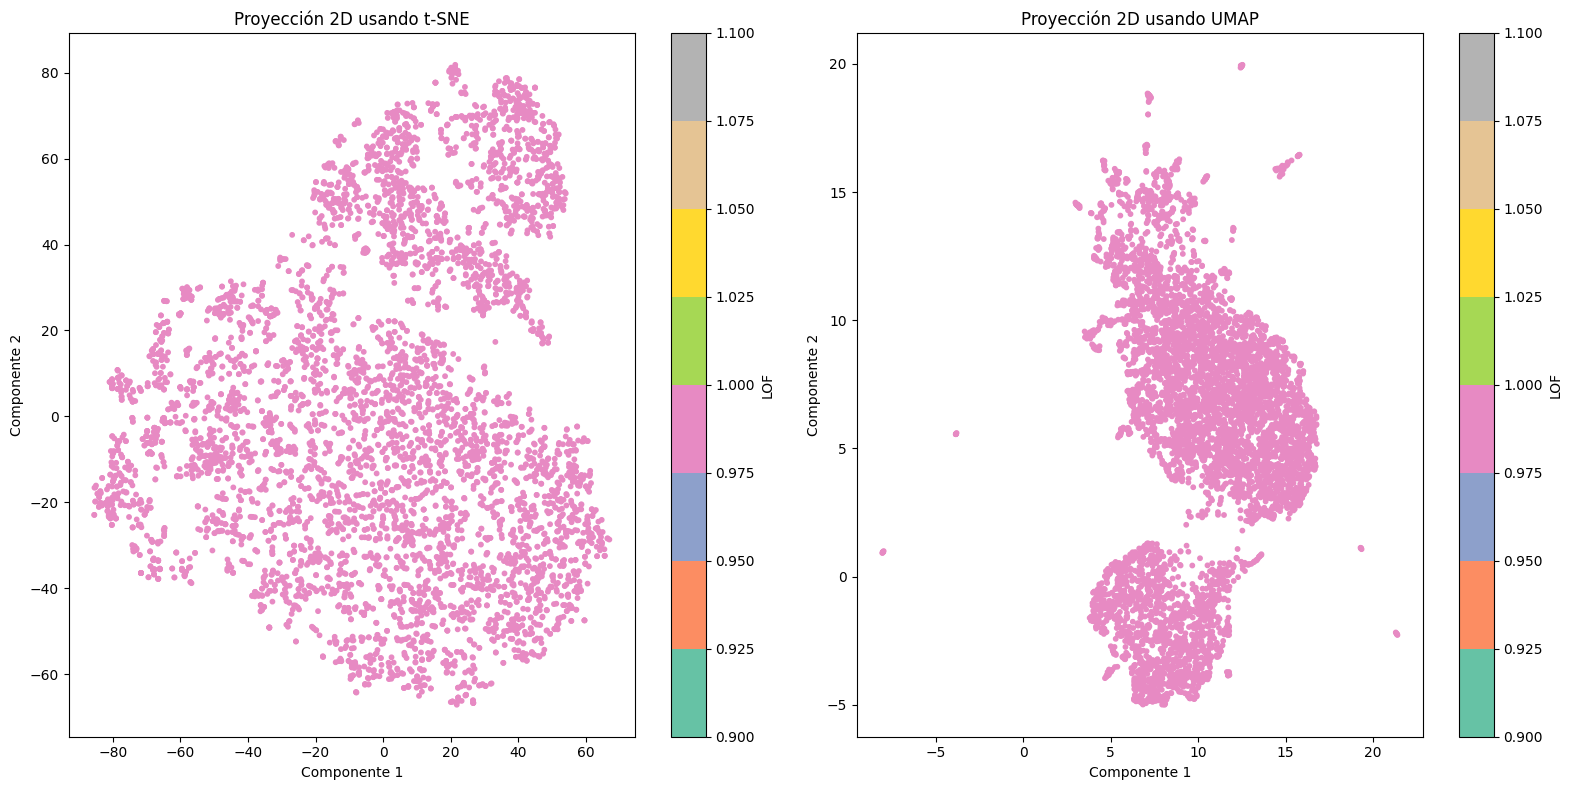

In [295]:
# Graficamos los resultados de UMAP y t-SNE
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(projection[:, 0], projection[:, 1], c=df_vinos_LOF_clean["LOF"], cmap="Set2", s=10)
plt.title("Proyección 2D usando t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="LOF")

plt.subplot(1, 2, 2)
plt.scatter(projection_umap[:, 0], projection_umap[:, 1], c=df_vinos_LOF_clean["LOF"], cmap="Set2", s=10)
plt.title("Proyección 2D usando UMAP")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="LOF")
plt.tight_layout()
plt.show()

**Diferencias de gráficos:** Luego de graficar ambos modelos, se puede observar que ambos poseen distintos resultados, esto debido a que como el modelo T-SNE utiliza probabilidades para calcular la similitud entre puntos, por lo que puede llegar a ser más sensible y, por lo tanto, generar resultados que a simple vista pueden parecer más agrupados. Por otro lado, el modelo UMAP al basasrse en la topología de los datos, puede generar resultados mucho más visuales y menos agrupados, lo que puede ser útil para identificar patrones o clusters en los datos. Sin embargo, ambos modelos logran representar la estructura de los datos de forma efectiva y pueden ser utilizados dependiendo del objetivo del análisis.

### 4.3 TSNE y UMAP con labels (8 puntos)

Sobre los gráficos obtenidos en los puntos 4.1 (T-SNE) y 4.2 (UMAP), incorpore la variable "type" del dataset original de tal manera que se pueda observar a qué tipo de vino corresponde cada punto del gráfico. ¿Se observa algún patrón?

Luego, repita el mismo procedimiento, pero trabajando con la variable "quality". Es decir, cada punto en el gráfico debe reflejar la calidad de vino.

Analice los resultados y formule una conclusión.

RESPUESTA:

In [296]:
# Añadimos las columnas "quality" y "type" al dataset limpio
df_vinos_LOF_clean["quality"] = df_vinos["quality"].values[lof_scores >= -1.5]
df_vinos_LOF_clean["type"] = df_vinos["type"].values[lof_scores >= -1.5]
df_vinos_LOF_clean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,LOF,quality,type
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,1,6,white
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,1,6,white
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,1,6,white
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1,6,white
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0.247934,0.360000,0.048193,0.019939,0.098007,0.093750,0.073733,0.181222,0.542636,0.337079,0.217391,1,6,red
6492,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.150183,0.565891,0.202247,0.362319,1,5,red
6494,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.166377,0.542636,0.297753,0.434783,1,6,red
6495,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.161172,0.658915,0.275281,0.318841,1,5,red


In [297]:
# Creamos DataFrames de las proyecciones y agregamos las variables de "type" y "quality"
tsne_df = pd.DataFrame(projection, columns=["Dim1", "Dim2"])
tsne_df["type"] = df_vinos_LOF_clean["type"].values
tsne_df["quality"] = df_vinos_LOF_clean["quality"].values

umap_df = pd.DataFrame(projection_umap, columns=["Dim1", "Dim2"])
umap_df["type"] = df_vinos_LOF_clean["type"].values
umap_df["quality"] = df_vinos_LOF_clean["quality"].values

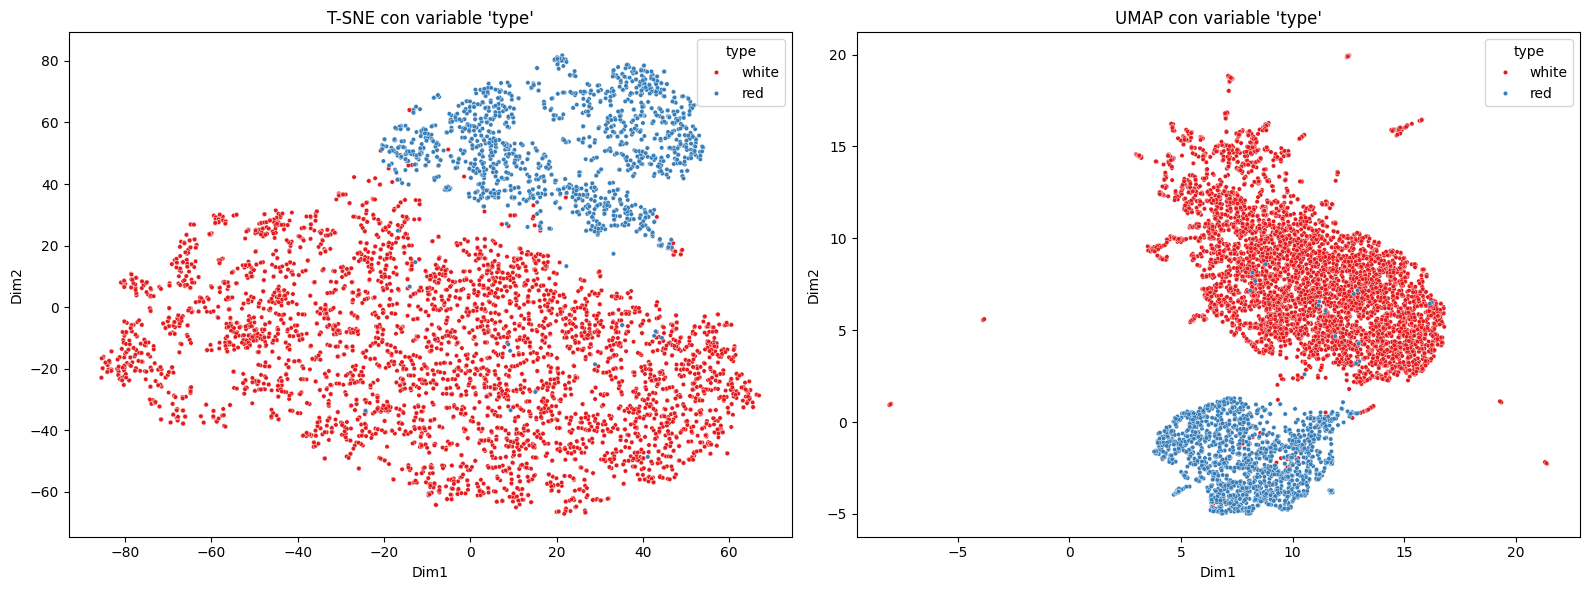

In [298]:

plt.figure(figsize=(16, 6))

# Gráfico de T-SNE con la variable "type"
plt.subplot(1, 2, 1)
sns.scatterplot(data=tsne_df, x="Dim1", y="Dim2", hue="type", palette="Set1", s=10)
plt.title("T-SNE con variable 'type'")
plt.xlabel("Dim1")
plt.ylabel("Dim2")

# Gráfico de UMAP con la variable "type"
plt.subplot(1, 2, 2)
sns.scatterplot(data=umap_df, x="Dim1", y="Dim2", hue="type", palette="Set1", s=10)
plt.title("UMAP con variable 'type'")
plt.xlabel("Dim1")
plt.ylabel("Dim2")

plt.tight_layout()
plt.show()

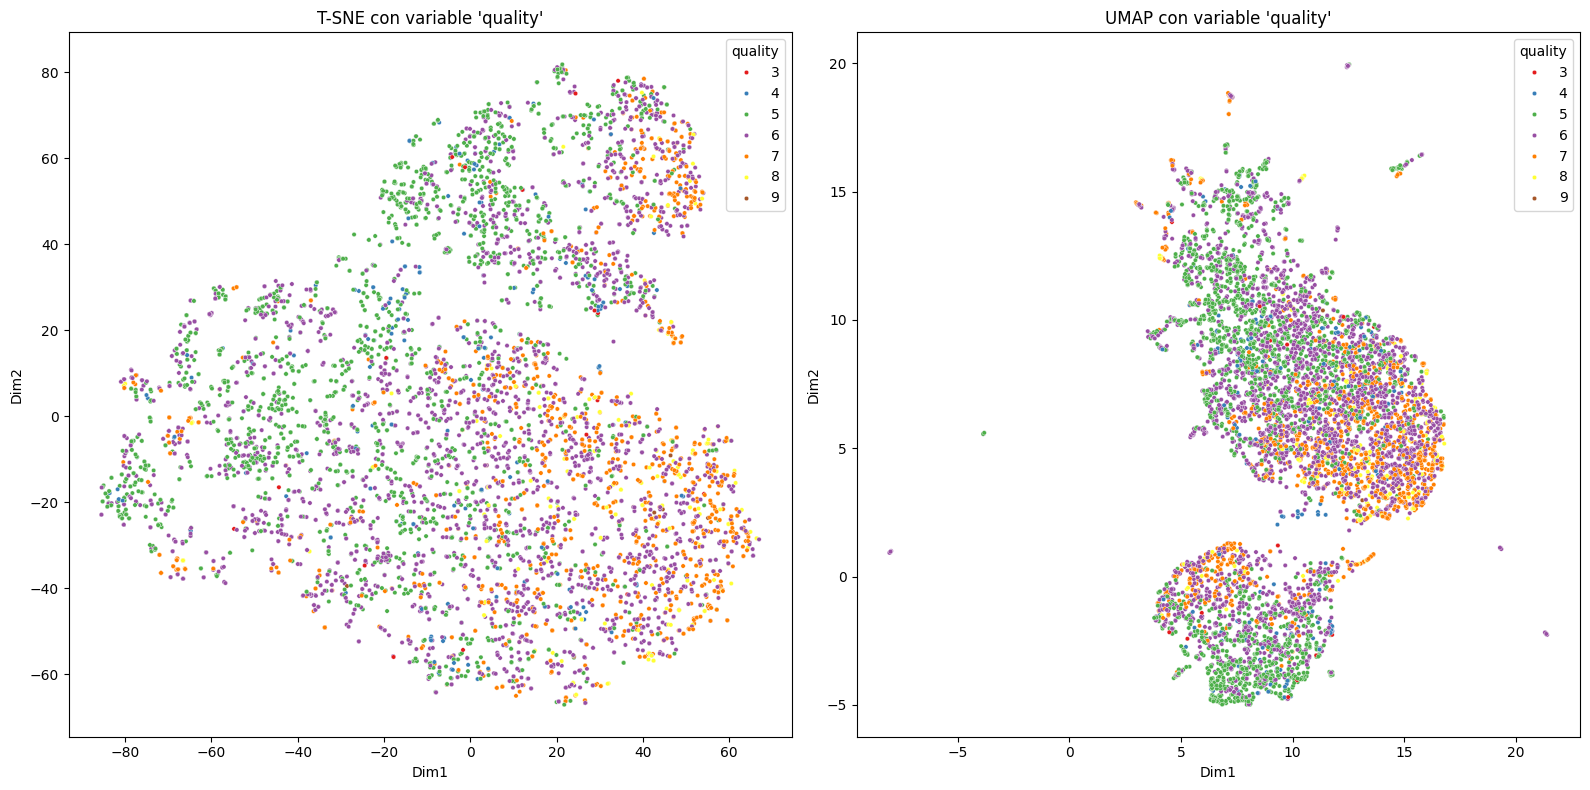

In [299]:
plt.figure(figsize=(16, 8))

# Gráfico de T-SNE con la variable "quality"
plt.subplot(1, 2, 1)
sns.scatterplot(data=tsne_df, x="Dim1", y="Dim2", hue="quality", palette="Set1", s=10)
plt.title("T-SNE con variable 'quality'")
plt.xlabel("Dim1")
plt.ylabel("Dim2")

# Gráfico de UMAP con la variable "quality"
plt.subplot(1, 2, 2)
sns.scatterplot(data=umap_df, x="Dim1", y="Dim2", hue="quality", palette="Set1", s=10)
plt.title("UMAP con variable 'quality'")
plt.xlabel("Dim1")
plt.ylabel("Dim2")

plt.tight_layout()
plt.show()

**Conclusión:** Viendo ambos gráficos, gracias a los modelos UMAP y T-SNE, se puede observar que la variable de `quality` no posee una estrecha relación con el tipo de vino, esto debido a que a nivel gráfico se logra presenciar una gran variedad de puntos de distinta calidad tanto en el "cluster" de vinos rojos como en el de vinos blancos. Sin embargo, al analizar la variable de `type` y su clasificación, se puede observar que su distinción de puntos se realizó de manera más efectiva, logrando separar aquellos vinos rojos de los blancos, además de haber logrado pasar de un espacio de alta dimensionalidad a uno de baja dimensionalidad, conservando la estructura de los datos y logrando una buena representación gráfica de los mismos.